<a href="https://colab.research.google.com/github/harshnandwana/Machine-learning-projects/blob/main/hand%20gesture%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.19.5
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00405/Postures.zip

--2022-06-15 18:21:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00405/Postures.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14660674 (14M) [application/x-httpd-php]
Saving to: ‘Postures.zip’

Postures.zip        100%[===================>]  13.98M  69.2MB/s    in 0.2s    

2022-06-15 18:21:25 (69.2 MB/s) - ‘Postures.zip’ saved [14660674/14660674]



In [ ]:
! unzip Postures.zip

Archive:  Postures.zip
  inflating: Postures.csv            


In [ ]:
df=pd.read_csv('Postures.csv')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,78096.0,2.983738,1.421183,0.000000,2.000000,3.000000,4.000000,5.000000
User,78096.0,7.959127,4.697810,0.000000,5.000000,9.000000,12.000000,14.000000
X0,78096.0,50.345664,32.696173,-108.552738,29.295062,54.619964,72.488686,190.017835
Y0,78096.0,85.812051,40.204363,-98.233756,63.494432,86.526246,113.107355,169.175464
Z0,78096.0,-29.984712,34.361918,-126.770872,-56.356438,-30.864125,-1.418803,113.345119
X1,78096.0,49.595209,32.478238,-111.685241,28.755137,54.215514,71.762039,188.691997
Y1,78096.0,86.192647,40.453214,-96.142589,64.154529,87.542751,116.219398,170.209350
Z1,78096.0,-29.509202,34.764398,-166.006838,-57.360107,-30.184005,-0.366692,104.697852
X2,78096.0,48.612121,33.605390,-106.886524,25.170006,53.814580,71.561951,188.760168
Y2,78096.0,83.771315,41.023543,-100.789312,58.052385,86.458324,106.660827,168.186466


In [ ]:
def conv(x):
  return float(x)

for i in tqdm(df.columns):
  k=df[df[i]=='?'].index
  df[i].iloc[k]=0
  df[i]=df[i].apply(conv)

  0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 38/38 [00:05<00:00,  7.21it/s]


In [ ]:
users=df.groupby('User')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,78096.0,2.983738,1.421183,0.000000,2.000000,3.000000,4.000000,5.000000
User,78096.0,7.959127,4.697810,0.000000,5.000000,9.000000,12.000000,14.000000
X0,78096.0,50.345664,32.696173,-108.552738,29.295062,54.619964,72.488686,190.017835
Y0,78096.0,85.812051,40.204363,-98.233756,63.494432,86.526246,113.107355,169.175464
Z0,78096.0,-29.984712,34.361918,-126.770872,-56.356438,-30.864125,-1.418803,113.345119
X1,78096.0,49.595209,32.478238,-111.685241,28.755137,54.215514,71.762039,188.691997
Y1,78096.0,86.192647,40.453214,-96.142589,64.154529,87.542751,116.219398,170.209350
Z1,78096.0,-29.509202,34.764398,-166.006838,-57.360107,-30.184005,-0.366692,104.697852
X2,78096.0,48.612121,33.605390,-106.886524,25.170006,53.814580,71.561951,188.760168
Y2,78096.0,83.771315,41.023543,-100.789312,58.052385,86.458324,106.660827,168.186466


In [ ]:
df['Z11'].unique()

array([  0.        ,  -3.14068455,  11.41522942, -45.39003589,
       -44.88086428,   3.80639507, -44.10295396,  10.33165236,
        10.38390109,  12.45232221,  11.30511762,  10.29956213,
        12.75717789,  11.49764321,  13.06112041,  13.91640633,
        15.25707097,  15.00709132,  13.0668263 ,  10.91712333,
        12.31004693,  11.41669713,  -8.95775248,  -6.36681563,
        11.10645597,  18.06228631,  12.22729562,  -9.70368055,
       -48.27467721,  15.84531929,  -5.89459902,  12.88600846])

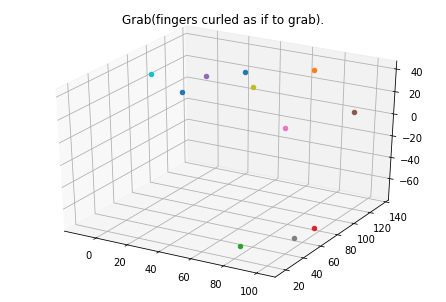

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def pltHand(handPoints):
    plt.close('all')
    fig = plt.figure()
    ax = Axes3D(fig)
    for i in range(11):
        pntx = f'X{i}'
        pnty = f'Y{i}'
        pntz = f'Z{i}'
        if(handPoints[pntx].values[0] == 0 or
            handPoints[pnty].values[0] == 0 or
            handPoints[pntz].values[0] == 0):
            n = 0;
        else:
            xlocation = handPoints[pntx]
            ylocation = handPoints[pnty]
            zlocation = handPoints[pntz]
            ax.scatter(xlocation, ylocation, zlocation, marker='o')
    crntClass = handPoints['Class'].values[0]
    if (crntClass == 1):
        title = 'Fist(with thumb out)'
    if(crntClass == 2):
        title = 'Stop(hand flat)'
    if (crntClass == 3):
        title = 'Point1(point with pointer finger)'
    if (crntClass == 4):
        title = 'Point2(point with pointer and middle fingers)'
    if (crntClass == 5):
        title = 'Grab(fingers curled as if to grab).'
    plt.title(title)
w = np.random.randint(df.shape[0], size=1)[0]
pltHand(df[w:w+1] )

In [ ]:
#standardize after removing class and user
#post standardization add user as ohe
#y as classes
#use bidirectional lstm in model 


In [ ]:
x=df.drop(['Class','User'],axis=1)
y=df.Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


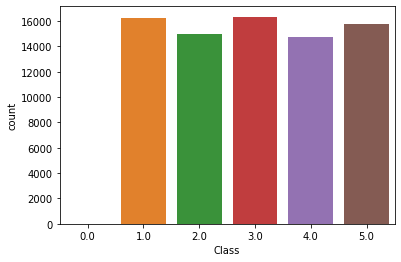

In [ ]:
sns.countplot(y)

In [ ]:
def conver(x):
  return int(x)
y=y.apply(conver)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
one_hot = pd.get_dummies(df["User"],prefix="user")

In [ ]:
x=pd.DataFrame(x)
x=pd.concat([x,one_hot],axis=1)
x.head(5)

,0,1,2,3,4,5,6,7,8,9,...,user_5.0,user_6.0,user_7.0,user_8.0,user_9.0,user_10.0,user_11.0,user_12.0,user_13.0,user_14.0
0,-1.539813,-2.134410,0.872620,-1.527039,-2.130689,0.848839,-1.446567,-2.042043,0.870172,-1.412507,...,0,0,0,0,0,0,0,0,0,0
1,0.119838,-0.356811,-1.013425,0.840581,-1.081012,-1.244711,-0.356817,-0.050965,-0.636637,1.092328,...,0,0,0,0,0,0,0,0,0,0
2,0.189072,-0.336917,-0.929830,-0.322040,-0.090330,-0.577816,0.910920,-0.987664,-1.122490,1.157529,...,0,0,0,0,0,0,0,0,0,0
3,0.168347,-0.331881,-0.948093,-0.357362,-0.088036,-0.606862,0.887941,-0.980027,-1.141738,1.139441,...,0,0,0,0,0,0,0,0,0,0
4,0.152434,-0.350829,-0.980867,-0.401297,-0.106887,-0.668607,1.122104,-0.379216,-1.186441,0.397702,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.drop(0,inplace=True)
x.drop(0,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [ ]:
y_tr_ohe=pd.get_dummies(y_train,prefix='y')
y_te_ohe=pd.get_dummies(y_test,prefix='y')

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.InputLayer((50)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True),input_shape=(1,50)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, go_backwards=True)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(5, activation='sigmoid')])

In [ ]:
from sklearn.metrics import confusion_matrix

def balanced_error_rate(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    print(0.5 * (FP/(TN + FP) + FN/(FN + TP)))

def losse(y_true, y_pred):
    weight_a = tf.reduce_mean(1 - y_true) * tf.cast(y_true, tf.float32)
    weight_b = (1 - tf.reduce_mean(1 - y_true)) * tf.cast(1 - y_true, tf.float32)
    
    o = (tf.math.log1p(tf.exp(-tf.abs(y_pred))) + tf.nn.relu(-y_pred)) * (weight_a + weight_b) + y_pred * weight_b
    return tf.reduce_mean(o)

In [ ]:
model.compile(optimizer='adam', loss=losse,metrics=['accuracy'] )
history = model.fit(X_train,y_tr_ohe,epochs=20,batch_size=128, validation_data=(X_test, y_te_ohe))

Epoch 1/20
489/489 [==============================] - 3s 4ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 2/20
489/489 [==============================] - 2s 3ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0282 - val_accuracy: 0.9920
Epoch 3/20
489/489 [==============================] - 2s 3ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0295 - val_accuracy: 0.9913
Epoch 4/20
489/489 [==============================] - 1s 3ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0304 - val_accuracy: 0.9914
Epoch 5/20
489/489 [==============================] - 2s 3ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0285 - val_accuracy: 0.9921
Epoch 6/20
489/489 [==============================] - 2s 3ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 7/20
489/489 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0244 - val_accuracy: 0.9926
Epoch 

In [ ]:
modelpredict = model.predict(X_test)
maximumInTensor = tf.math.argmax(modelpredict, axis=-1)

In [ ]:
a=list(maximumInTensor)
for i in range(len(a)):
  a[i]+=1

In [ ]:
print(tf.math.confusion_matrix(y_test,a))

tf.Tensor(
[[   0    0    0    0    0    0]
 [   0 3244    5    4    0    0]
 [   0    4 2968    1   13   10]
 [   0    5    4 3237   20    3]
 [   0    1  106  511 2333    4]
 [   0    0   16    3   10 3117]], shape=(6, 6), dtype=int32)
